---
title: HW 1
author: Dongyang Wang
date: today
---

# Q1

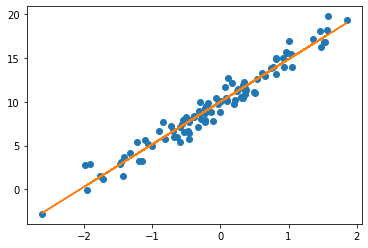

In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(42)

# a
x = np.random.normal(size = 100)
e = np.random.normal(size = 100)
y = 10 + 5*x + e

# b
x = x.reshape((-1, 1))
reg = LinearRegression().fit(x, y)

# c
plt.plot(x, y, 'o')
plt.plot(x, reg.coef_*x+reg.intercept_)


# Q2


## a
The sample space is {1,2,3,4,5,6}. The event space is the power set of the sample space, including $2^6 = 64$ elements, e.g., 1,2, {1,2}. The probability measure is $P(X= i) = \frac{1}{6}$ where $i \in \{1,2,3,4,5,6\}$.

## b
The sample space is {I,D,R}. The event space is {$\phi$, {I}, {D}, {R}, {I,D}, {I,R}, {D,R}, {I,D,R}}. The probability measure is $P(X = I) = 0.4$, $P(X = R) = 0.2$, $P(X = D) = 0.4$.

# Q3

## 3.1

### a

$E(X) = \int_{x} x p(x) \,dx$

### b
$Var(X) = E[( X- E(X))^2]$

### c

\begin{align*}
Var(X) &= E[( X- E(X))^2]\\
&= E[X^2 + (E(X))^2 - 2XE(X)]\\
&= E(X^2) + (E(X))^2 - 2(E(X))^2\\
&= E(X^2) - (E(X))^2
\end{align*}


### d
$SD[X] = \sqrt{Var(X)} = \sqrt{E[( X- E(X))^2]}$

### e
Let $y = g(x)$, $E(y) = \Sigma_y y f(y) = \Sigma_y g(x) P(g(x) = y) = \Sigma_x g(x) p(x)$.

### f
$E(a+bX) = \int_x (a+bX) p(x) \,dx = \int_x ap(x) \,dx + \int_x bX p(x) \,dx = a *1 + b * E(x) = a + b E(X)$

### g
$Var(a + bX) = (E((a+bX) - E(a+bX)))^2 = (E(bX - bE(X)))^2 = (b * E(X - E(X)))^2 = b^2 Var(X)$

### h
$SD(a+bX) = \sqrt{Var(a + bX)} =  \sqrt{b^2 Var(X)} = |b| SD(X)$

## 3.2
### Markov

\begin{align*}
    E(X) &= \int_0^{\infty} xp(x) \,dx\\
    &= \int_0^{a} xp(x) \,dx + \int_a^{\infty} xp(x) \,dx\\
    &\geq \int_a^{\infty} xp(x) \,dx\\
    &\geq \int_a^{\infty} ap(x) \,dx\\
    &= a \int_a^{\infty} p(x) \,dx\\
    &= a P(X \geq a)
\end{align*}

So, $P(X\geq a) \leq \frac{E(X)}{a}$

### Chebyshev

\begin{align*}
P(|X - E(X)| \geq k\sigma) &= P((X - E(X))^2 \geq k^2\sigma^2)\\
&\leq \frac{\sigma^2}{k^2\sigma^2}\\
&= \frac{1}{k^2}
\end{align*}

So, $P(|X - E(X)| \geq k\sigma) \leq \frac{1}{k^2}$ where $\sigma = SD(X)$.

## 3.3

### a

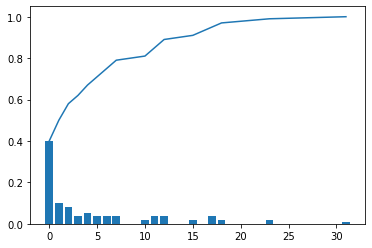

In [114]:
snow = [0,1,2,3,4,5,6,7,10,11,12,15,17,18,23,31]
prob = [0.4,0.1,0.08,0.04,0.05,0.04,0.04,0.04,0.02,0.04,0.04,0.02,0.04,0.02,0.02,0.01]

# pmf
plt.bar(snow,prob)

# cdf
cdf = prob.copy()
for p in range(len(cdf)):
    if p == 0:
        continue
    cdf[p] = cdf[p] + cdf[p-1]

plt.plot(snow,cdf)

The expectation is the dot product. 

### b

In [115]:
import itertools

# E(X)
np.dot(snow, prob)

4.529999999999999

The median depends on if there are odd or even number of data. If odd, the median is 1 because that is where 50%% of the data is equal to or below; if even, the median should be 1.5 because 1 and 2 are both used to compute the median. the mode is simply 0, where by observation most data points reside. The variance is calculated below.

In [116]:
# median
1
1.5

# mode
0

# Var
count = [int(i * 100) for i in prob]
count
new_snow = []
for i in range(len(count)):
    new_snow.extend(itertools.repeat(snow[i],count[i]))
np.var(new_snow)

40.78909999999999

The 95% is found using index, and the inches is 17.

In [117]:
# percentile 95%
cdf
snow[cdf.index(0.9500000000000003)]

17

### c

In [118]:
1 - prob[0]

0.6

### d
The best predictor I would use is the mode, because I define the best to be the most likely case. And in other words, no snow is my prediction.

### e
If I use E(X), the expected squared error would be the variance, i.e., (E(X-E(X)))^2.

### f
A 95% prediction interval should cover 95% of the data. As we have shown above, we know the 95% percentile. So we can simply choose [0,17].

# Q4

## a
$E[(X-c)^2] = (E(X-c))^2 + Var(X-c) = Var(X) + (E(X-c))^2$ since c is constant and Var(X - c) = Var(X).

## b
$argmin_{c \in R} E[(X-c)^2]= argmin_{c \in R}  Var(X) + (E(X-c))^2 = argmin_{c \in R} (E(X)-c)^2$
Since $(E(X)-c)^2 \geq 0$, we have $(E(X)-c)^2 = 0$ for minimization. That means $E(X) = argmin_{c \in R} E[(X-c)^2]$.

## c
We take the derivative and set it equal to 0 to find the minimum. $\frac{d E(|X-c|)}{d c} = E( \frac{d |X-c|}{d c} ) = E \frac{x-c}{|X-c|} = E (I(x \leq c) + I(x \geq c)) = 0$. To solve this, we need $I(x \leq c) = I(x \geq c)$ which means by definition is $c = Median[X]$, equivalent to $P(X\leq c) = \frac{1}{2}$ such that $Median[X] = argmax_{c\in R} E(|X-c|)$.

## d
By definition, $Mode[X] = argmax_{c\in R} P(X=c) = argmax_{c\in R} P(X-c = 0)$.

# Q5

## 5.1

### a
$E(a+bX+cY) = E(a) + E(bX) + E(cY) = a + bE(X) + cE(Y)$

### b
Given some value of x, the expected value of Y.

### c
Given some value of x, the variance of Y.

### d
$Cov(X,Y) = E((X - E(X))(Y - E(Y)))$

### e
$Cov(X,Y) = E((X - E(X))(Y - E(Y))) = E(XY -YE(X) -XE(Y) +E(X)E(Y)) = E(XY) - 2 E(X)E(Y) + E(X)E(Y) = E(XY) - E(X)E(Y)$

$Cov(X,X) = E(X^2) -E(X)E(X) = Var(X)$

### f
$Cov(bX,cY) = E(bXcY) - E(bX)E(cY) = bc(E(XY) - E(X)E(Y)) = bcCov(X,Y)$

### g
$Var(a + bX + cY) = Var(bX + cY) = Var(bX) + Var(cY) + 2 Cov(bX, cY) = b^2Var(X) + c^2Var(Y) + 2bcCov(X,Y)$

### h
$Cov(Y+X, Z) = E(YZ + XZ) - E(Y+X)E(Z) = E(YZ) + E(XZ) - E(Y)E(Z) - E(X)E(Z) = Cov(Y, Z) + Cov(X, Z)$

### i
$Cor(X,Y) = \frac{Cov(X,Y)}{SD(X)SD(Y)}$

### j
$Cor(a+bX,c+dY) = \frac{Cov(a+bX,c+dY) }{SD(a+bX)SD(c+dY)} = \frac{1}{|b||d|} \frac{E((a+bX)(c+dY)) - E(a+bX)E(c+dY)}{SD(X)SD(Y)} = \frac{1}{|b||d|} \frac{E((bX)(dY)) - E(bX)E(dY)}{SD(X)SD(Y)} = \frac{bd}{|b||d|} \frac{E((X)(Y)) - E(X)E(Y)}{SD(X)SD(Y)} = \frac{bd}{|b||d|} \frac{Cov(X,Y)}{SD(X)SD(Y)} = \frac{bd}{|b||d|} Cor(X,Y)$

## 5.2

In [159]:
with open('data.txt') as text:
    data = text.read()
data = data.split()
data1 = []
for i in data:
    data1.append(float(i))

# check if data is right
sum(data1)

# reshape
data1 = np.reshape(data1, (9,-1))
data1

# load in X & Y 
X = '0.5 1.5 2.5 3.5 4.5 5.5 6.7 8.8 12.5 17.5'.split()
X = [float(i) for i in X]

Y = [-0.25, -0.18, -0.05, 0, 0.05, 0.15, 0.25, 0.4, 0.5]

### a
Joint distribution describes the probability distribution when there are two or more random variables.

### b

In [160]:
marginal_y = [0]*9
marginal_x = [0]*10

# marginal y
for col in range(len(data1)):
    marginal_y[col] = sum(data1[col])

marginal_y

[0.07,
 0.065,
 0.098,
 0.208,
 0.302,
 0.028999999999999998,
 0.09500000000000001,
 0.07,
 0.063]

In [161]:
# marginal x
for i in range(len(data1)):
    for j in range(len(data1[i])):
        marginal_x[j] += data1[i][j]

marginal_x

[0.041,
 0.09299999999999999,
 0.093,
 0.08200000000000002,
 0.11299999999999999,
 0.10300000000000001,
 0.15500000000000003,
 0.15500000000000003,
 0.11300000000000002,
 0.05200000000000001]

### c

In [162]:
import pandas as pd
data2 = pd.DataFrame(data1)
data2.columns = X
data2.index = Y[::-1]

data2

,0.5,1.5,2.5,3.5,4.5,5.5,6.7,8.8,12.5,17.5
0.50,0.001,0.011,0.007,0.006,0.005,0.005,0.008,0.009,0.014,0.004
0.40,0.001,0.002,0.006,0.007,0.010,0.007,0.008,0.009,0.008,0.007
0.25,0.002,0.006,0.004,0.007,0.010,0.011,0.020,0.019,0.013,0.006
0.15,0.002,0.009,0.009,0.012,0.016,0.020,0.042,0.054,0.024,0.020
0.05,0.010,0.023,0.033,0.031,0.041,0.029,0.047,0.039,0.042,0.007
0.00,0.013,0.013,0.000,0.002,0.001,0.000,0.000,0.000,0.000,0.000
-0.05,0.001,0.012,0.011,0.005,0.012,0.016,0.017,0.014,0.004,0.003
-0.18,0.002,0.008,0.013,0.006,0.009,0.008,0.008,0.008,0.006,0.002
-0.25,0.009,0.009,0.010,0.006,0.009,0.007,0.005,0.003,0.002,0.003


In [163]:
total_prob_x = [0]*10
for i in range(len(data1)):
    for j in range(len(data1[i])):
        total_prob_x[j] += data1[i][j]

data3 = data1.copy()

for i in range(len(data3)):
    for j in range(len(data3[i])):
        data3[i,j] = data3[i][j]/total_prob_x[j]

# verified that columns sum up to 1
pd.DataFrame(data3).sum(axis = 0)

pd.DataFrame(data3)

,0,1,2,3,4,5,6,7,8,9
0,0.024390,0.118280,0.075269,0.073171,0.044248,0.048544,0.051613,0.058065,0.123894,0.076923
1,0.024390,0.021505,0.064516,0.085366,0.088496,0.067961,0.051613,0.058065,0.070796,0.134615
2,0.048780,0.064516,0.043011,0.085366,0.088496,0.106796,0.129032,0.122581,0.115044,0.115385
3,0.048780,0.096774,0.096774,0.146341,0.141593,0.194175,0.270968,0.348387,0.212389,0.384615
4,0.243902,0.247312,0.354839,0.378049,0.362832,0.281553,0.303226,0.251613,0.371681,0.134615
5,0.317073,0.139785,0.000000,0.024390,0.008850,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.024390,0.129032,0.118280,0.060976,0.106195,0.155340,0.109677,0.090323,0.035398,0.057692
7,0.048780,0.086022,0.139785,0.073171,0.079646,0.077670,0.051613,0.051613,0.053097,0.038462
8,0.219512,0.096774,0.107527,0.073171,0.079646,0.067961,0.032258,0.019355,0.017699,0.057692


Above is the conditional distribution of Y given X, each probability means that for a given X=x, Y takes on a certain probability.

### d

In [164]:
cond_expectation = [0]*10

for i in range(10):
    for j in range(9):
        cond_expectation[i] += data3[j,i] * Y[j]

# conditional expectation
cond_expectation

[0.1821951219512195,
 0.11172043010752689,
 0.12440860215053764,
 0.06573170731707317,
 0.08628318584070796,
 0.08825242718446602,
 0.05070967741935484,
 0.03438709677419355,
 0.00805309734513275,
 0.01615384615384615]

In [165]:
# expectation with conditional
total = 0
for i in range(10):
    total += total_prob_x[i] * cond_expectation[i]

total

0.06859999999999998

In [166]:
# expectation without conditional
total1 = 0
y = Y[::-1]
for i in range(10):
    for j in range(9):
        total1 += data1[j][i] * Y[j]

total1

0.06860000000000001

The results from both calculations are the same (although there are some round off errors). So we have shown $E(E(Y|X)) = E(Y)$.

### e & f

In [167]:
# Use probability to produce some data points for the actual regression
data4 = data1.copy()
data5 = data4*1000
data5

array([[ 1., 11.,  7.,  6.,  5.,  5.,  8.,  9., 14.,  4.],
       [ 1.,  2.,  6.,  7., 10.,  7.,  8.,  9.,  8.,  7.],
       [ 2.,  6.,  4.,  7., 10., 11., 20., 19., 13.,  6.],
       [ 2.,  9.,  9., 12., 16., 20., 42., 54., 24., 20.],
       [10., 23., 33., 31., 41., 29., 47., 39., 42.,  7.],
       [13., 13.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 12., 11.,  5., 12., 16., 17., 14.,  4.,  3.],
       [ 2.,  8., 13.,  6.,  9.,  8.,  8.,  8.,  6.,  2.],
       [ 9.,  9., 10.,  6.,  9.,  7.,  5.,  3.,  2.,  3.]])

In [168]:
reg_x = []
reg_y = []
for i in range(9):
    for j in range(10):
        if data5[i,j] != 0:
            reg_x.extend(itertools.repeat(X[j], int(data5[i,j])))
            reg_y.extend(itertools.repeat(Y[i], int(data5[i,j])))             

# lengths are 1000, seem right
len(reg_x)
len(reg_y)

1000

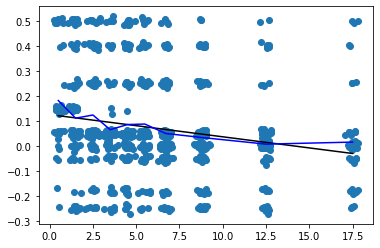

In [172]:
import statsmodels.api as sm
# add a constant to covariates
x  = sm.add_constant(reg_x)

ols = sm.OLS(reg_y, x)
ols_fit = ols.fit()

# create predicted values
yhat = ols_fit.predict()

# Cite: https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# regression plot
plt.scatter(rand_jitter(reg_x), rand_jitter(reg_y))
plt.plot(reg_x, yhat, color = 'black')

# Conditional expectation
plt.plot(X, cond_expectation, color = 'blue')

Therefore, we can observe that the black regression line (BLP) is pretty close to the conditional expectation blue line (CEF).